# Advanced Machine Learning 

In [12]:
# Load dataset (iris), split into X_train, y_train, X_test, y_test!
# Write your code here
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = pd.Series(iris.target)

In [14]:
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 1. Voting 

In [34]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# Hint: 
# clf_voting = VotingClassifier( estimators=[('label1', clf_1),
#('label2', clf_2),
#('labelN', clf_N)]) 

# Create the individual models
clf_knn = KNeighborsClassifier(5)
clf_dt = DecisionTreeClassifier()
clf_lr = LogisticRegression()

# Create voting classifier
clf_voting = VotingClassifier(estimators=[
('knn', clf_knn),
('dt', clf_dt),
('lr', clf_lr)])

# Fit it to the training set and predict
clf_voting.fit(X_train, y_train)
y_pred = clf_voting.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.0f}%".format(acc*100))

Accuracy: 100%


C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


## 2. Averaging 

In [24]:
# Template for averaging Classifier 

from sklearn.ensemble import VotingClassifier

# clf_voting = VotingClassifier(
# estimators=[
#('label1', clf_1),
#('label2', clf_2),
#...
#('labelN', clf_N)],
#voting='soft',
#weights=[w_1, w_2, ..., w_N]
#)

clf_voting = VotingClassifier(estimators=[
('knn', clf_knn),
('dt', clf_dt),
('lr', clf_lr)], voting='soft')

# Fit it to the training set and predict
clf_voting.fit(X_train, y_train)
y_pred = clf_voting.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy: {:.0f}%".format(acc*100))

Accuracy: 100%


C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [ ]:
# Initiate the individual models 

# Write your code here! 

# Create averaging classifier

# Write your code here! 

## 3. Bagging

In [42]:
from sklearn.datasets import load_breast_cancer
from IPython.display import display, Markdown
pd.options.display.max_columns = None
pd.options.display.max_rows = 15

bc = load_breast_cancer()
data = pd.DataFrame(bc.data, columns=bc.feature_names)
data['target'] = pd.Series(bc.target)
data.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
316,12.18,14.08,77.25,461.4,0.07734,0.03212,0.01123,0.005051,0.1673,0.05649,0.2113,0.5996,1.438,15.82,0.005343,0.005767,0.011230,0.005051,0.01977,0.000950,12.85,16.47,81.60,513.1,0.1001,0.05332,0.04116,0.01852,0.2293,0.06037,1
405,10.94,18.59,70.39,370.0,0.10040,0.07460,0.04944,0.029320,0.1486,0.06615,0.3796,1.7430,3.018,25.78,0.009519,0.021340,0.019900,0.011550,0.02079,0.002701,12.40,25.58,82.76,472.4,0.1363,0.16440,0.14120,0.07887,0.2251,0.07732,1
235,14.03,21.25,89.79,603.4,0.09070,0.06945,0.01462,0.018960,0.1517,0.05835,0.2589,1.5030,1.667,22.07,0.007389,0.013830,0.007302,0.010040,0.01263,0.002925,15.33,30.28,98.27,715.5,0.1287,0.15130,0.06231,0.07963,0.2226,0.07617,1
81,13.34,15.86,86.49,520.0,0.10780,0.15350,0.11690,0.069870,0.1942,0.06902,0.2860,1.0160,1.535,12.96,0.006794,0.035750,0.039800,0.013830,0.02134,0.004603,15.53,23.19,96.66,614.9,0.1536,0.47910,0.48580,0.17080,0.3527,0.10160,1
498,18.49,17.52,121.30,1068.0,0.10120,0.13170,0.14910,0.091830,0.1832,0.06697,0.7923,1.0450,4.851,95.77,0.007974,0.032140,0.044350,0.015730,0.01617,0.005255,22.75,22.88,146.40,1600.0,0.1412,0.30890,0.35330,0.16630,0.2510,0.09445,0


In [43]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [69]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

bagging = BaggingClassifier(KNeighborsClassifier(3),
                           max_samples=0.5, max_features=0.5)
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)

In [47]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [55]:
cname = load_breast_cancer().target_names

Confusion matrix, without normalization
[[57 11]
 [ 4 99]]


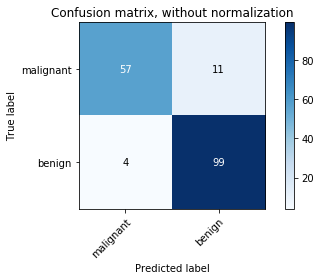

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

plot_confusion_matrix(y_test, y_pred, cname)
plt.show()

In [70]:
accuracy_score(y_test, y_pred)

0.9122807017543859

In [74]:
from sklearn.tree import DecisionTreeClassifier
# Write your code here if base classifier = decision tree!

bagging_dtc = BaggingClassifier(DecisionTreeClassifier(), max_features=0.5, max_samples=0.5)
bagging_dtc.fit(X_train, y_train)
y_pred = bagging_dtc.predict(X_test)

Confusion matrix, without normalization
[[66  2]
 [ 7 96]]


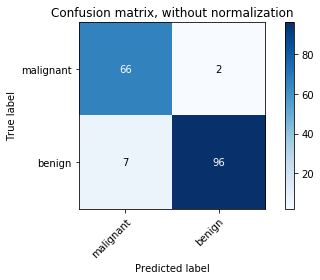

In [75]:
plot_confusion_matrix(y_test, y_pred, cname)
plt.show()

In [71]:
# Write your code here if you use RandomForest, compare with above!

from sklearn.ensemble import RandomForestClassifier

bagging_rfc = BaggingClassifier(RandomForestClassifier(),
                           max_samples=0.5, max_features=0.5)
bagging_rfc.fit(X_train, y_train)
y_pred = bagging_rfc.predict(X_test)

C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 i

In [73]:
accuracy_score(y_test, y_pred)

0.9473684210526315

Confusion matrix, without normalization
[[63  5]
 [ 4 99]]


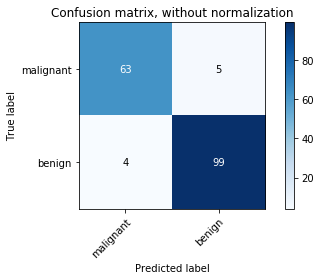

In [72]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

plot_confusion_matrix(y_test, y_pred, cname)
plt.show()

## 4. Boosting
Source: https://scikit-learn.org/stable/modules/ensemble.html

In [83]:
from sklearn.ensemble import AdaBoostClassifier
# clf_ada = AdaBoostClassifier(
# base_estimator,
# n_estimators,
# learning_rate
# )

# base_estimator
# Default: Decision Tree (max_depth=1)
# n_estimators
# Default: 50
# learning_rate
# Default: 1.0
# Trade-off between n_estimators and
# learning_rate
# clf_ada = AdaBoostClassifier()
clf_ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0)
clf_ada.fit(X_train, y_train)
y_pred = clf_ada.predict(X_test)

Confusion matrix, without normalization
[[ 63   5]
 [  3 100]]


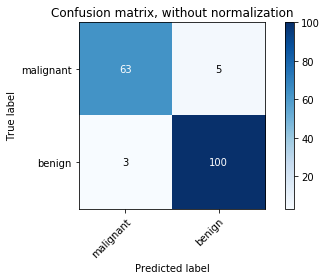

In [84]:
plot_confusion_matrix(y_test, y_pred, cname)
plt.show()

### Create AdaBoost Classifier for iris dataset!

In [ ]:
# Write your code here!

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

# reg_ada = AdaBoostRegressor(
# base_estimator,
# n_estimators,
# learning_rate,
# loss
# )

# base_estimator
# Default: Decision Tree (max_depth=3)
# loss
# linear (default)
# square
# exponential

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

clf_gbc = GradientBoostingClassifier()
clf_gbc.fit(X_train, y_train)
y_pred = clf_gbc.predict(X_test)

Confusion matrix, without normalization
[[65  3]
 [ 4 99]]


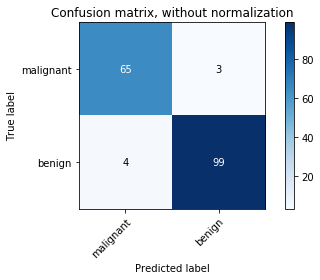

In [87]:
plot_confusion_matrix(y_test, y_pred, cname)
plt.show()

### Create GradientBoostingClassifier for iris Dataset!

In [5]:
# Write your code here!

In [94]:
# import xgboost as xgb => ini mesti install dulu 
import lightgbm as lgb
import catboost as cb
# Cek di sini: 
# https://stackoverflow.com/questions/35139108/how-to-install-xgboost-in-anaconda-python-windows-platform

### Create XGBoost, lightgbm, catboost for iris Dataset

## 5. Stacking  

In [90]:
import xgboost as xgb

clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(X_train, y_train)
y_pred = clf_xgb.predict(X_test)

Confusion matrix, without normalization
[[66  2]
 [ 5 98]]


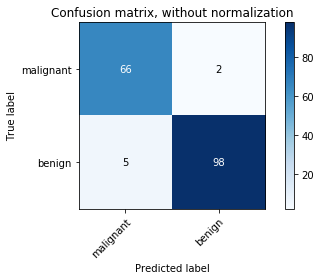

In [92]:
plot_confusion_matrix(y_test, y_pred, cname)

In [ ]:
# from mlxtend.classifier import StackingClassifier => ini mesti install dulu 

In [ ]:
# Instantiate the 1st-layer classifiers
# clf1 = Classifier1(params1)
# clf2 = Classifier2(params2)
# ...
# clfN = ClassifierN(paramsN)

# Instantiate the 2nd-layer classifier
# clf_meta = ClassifierMeta(paramsMeta)

# Build the Stacking classifier
# clf_stack = StackingClassifier(
# classifiers=[clf1, clf2, ... clfN],
# meta_classifier=clf_meta,
# use_probas=False,
# use_features_in_secondary=False)

# Use the fit and predict methods
# like with scikit-learn estimators
# clf_stack.fit(X_train, y_train)
# pred = clf_stack.predict(X_test)

In [96]:
from mlxtend.classifier import StackingClassifier
StackingClassifier()

In [97]:
from mlxtend.classifier import StackingClassifier
import lightgbm as lgb
import catboost as cb
import xgboost as xgb
from sklearn.linear_model import LogisticRegression

clf1 = lgb.LGBMClassifier(learning_rate=0.1)
clf2 = cb.CatBoostClassifier(learning_rate=0.1)
clf3 = xgb.XGBClassifier(learning_rate=0.1)
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[clf1, clf2, clf3], meta_classifier=lr)
sclf.fit(X_train, y_train)
y_pred = sclf.predict(X_test)

0:	learn: 0.6789006	total: 90.8ms	remaining: 1m 30s
1:	learn: 0.6679205	total: 116ms	remaining: 58.1s
2:	learn: 0.6568430	total: 137ms	remaining: 45.6s
3:	learn: 0.6408498	total: 149ms	remaining: 37.2s
4:	learn: 0.6304313	total: 164ms	remaining: 32.7s
5:	learn: 0.6224410	total: 176ms	remaining: 29.1s
6:	learn: 0.6164270	total: 185ms	remaining: 26.2s
7:	learn: 0.6081447	total: 194ms	remaining: 24.1s
8:	learn: 0.6045429	total: 204ms	remaining: 22.4s
9:	learn: 0.6004690	total: 213ms	remaining: 21.1s
10:	learn: 0.5953489	total: 225ms	remaining: 20.2s
11:	learn: 0.5910620	total: 235ms	remaining: 19.4s
12:	learn: 0.5870446	total: 245ms	remaining: 18.6s
13:	learn: 0.5824473	total: 255ms	remaining: 17.9s
14:	learn: 0.5777530	total: 267ms	remaining: 17.5s
15:	learn: 0.5705907	total: 283ms	remaining: 17.4s
16:	learn: 0.5649639	total: 293ms	remaining: 17s
17:	learn: 0.5594818	total: 306ms	remaining: 16.7s
18:	learn: 0.5567547	total: 316ms	remaining: 16.3s
19:	learn: 0.5527602	total: 325ms	remaini

170:	learn: 0.1713483	total: 1.89s	remaining: 9.15s
171:	learn: 0.1690441	total: 1.9s	remaining: 9.15s
172:	learn: 0.1673267	total: 1.91s	remaining: 9.15s
173:	learn: 0.1662283	total: 1.92s	remaining: 9.13s
174:	learn: 0.1653605	total: 1.93s	remaining: 9.12s
175:	learn: 0.1639914	total: 1.94s	remaining: 9.1s
176:	learn: 0.1638055	total: 1.95s	remaining: 9.08s
177:	learn: 0.1620165	total: 1.96s	remaining: 9.06s
178:	learn: 0.1609344	total: 1.97s	remaining: 9.04s
179:	learn: 0.1592531	total: 1.98s	remaining: 9.03s
180:	learn: 0.1589444	total: 1.99s	remaining: 9.01s
181:	learn: 0.1582476	total: 2s	remaining: 8.99s
182:	learn: 0.1569840	total: 2.01s	remaining: 8.97s
183:	learn: 0.1563321	total: 2.02s	remaining: 8.95s
184:	learn: 0.1553989	total: 2.03s	remaining: 8.93s
185:	learn: 0.1541482	total: 2.04s	remaining: 8.91s
186:	learn: 0.1535104	total: 2.05s	remaining: 8.9s
187:	learn: 0.1518571	total: 2.06s	remaining: 8.88s
188:	learn: 0.1505191	total: 2.07s	remaining: 8.87s
189:	learn: 0.1502

329:	learn: 0.0658246	total: 3.53s	remaining: 7.16s
330:	learn: 0.0655058	total: 3.54s	remaining: 7.15s
331:	learn: 0.0652773	total: 3.55s	remaining: 7.14s
332:	learn: 0.0649139	total: 3.56s	remaining: 7.13s
333:	learn: 0.0645993	total: 3.57s	remaining: 7.12s
334:	learn: 0.0645491	total: 3.58s	remaining: 7.1s
335:	learn: 0.0644804	total: 3.59s	remaining: 7.09s
336:	learn: 0.0642457	total: 3.6s	remaining: 7.08s
337:	learn: 0.0642053	total: 3.61s	remaining: 7.06s
338:	learn: 0.0638785	total: 3.62s	remaining: 7.05s
339:	learn: 0.0634327	total: 3.62s	remaining: 7.04s
340:	learn: 0.0631110	total: 3.63s	remaining: 7.02s
341:	learn: 0.0628834	total: 3.64s	remaining: 7.01s
342:	learn: 0.0627411	total: 3.65s	remaining: 7s
343:	learn: 0.0623652	total: 3.66s	remaining: 6.99s
344:	learn: 0.0623273	total: 3.67s	remaining: 6.97s
345:	learn: 0.0619789	total: 3.68s	remaining: 6.96s
346:	learn: 0.0618742	total: 3.69s	remaining: 6.95s
347:	learn: 0.0613932	total: 3.7s	remaining: 6.94s
348:	learn: 0.0610

490:	learn: 0.0342779	total: 5.14s	remaining: 5.33s
491:	learn: 0.0341443	total: 5.15s	remaining: 5.32s
492:	learn: 0.0340885	total: 5.16s	remaining: 5.31s
493:	learn: 0.0340265	total: 5.18s	remaining: 5.3s
494:	learn: 0.0338599	total: 5.2s	remaining: 5.3s
495:	learn: 0.0337631	total: 5.21s	remaining: 5.29s
496:	learn: 0.0337243	total: 5.22s	remaining: 5.29s
497:	learn: 0.0336123	total: 5.24s	remaining: 5.28s
498:	learn: 0.0334404	total: 5.25s	remaining: 5.27s
499:	learn: 0.0333203	total: 5.26s	remaining: 5.26s
500:	learn: 0.0332767	total: 5.27s	remaining: 5.25s
501:	learn: 0.0331638	total: 5.28s	remaining: 5.24s
502:	learn: 0.0330586	total: 5.29s	remaining: 5.23s
503:	learn: 0.0329794	total: 5.31s	remaining: 5.22s
504:	learn: 0.0329320	total: 5.32s	remaining: 5.21s
505:	learn: 0.0328319	total: 5.33s	remaining: 5.21s
506:	learn: 0.0327122	total: 5.35s	remaining: 5.2s
507:	learn: 0.0326018	total: 5.37s	remaining: 5.2s
508:	learn: 0.0324326	total: 5.38s	remaining: 5.19s
509:	learn: 0.032

650:	learn: 0.0226483	total: 6.95s	remaining: 3.73s
651:	learn: 0.0226336	total: 6.96s	remaining: 3.72s
652:	learn: 0.0225901	total: 6.98s	remaining: 3.71s
653:	learn: 0.0225531	total: 6.99s	remaining: 3.7s
654:	learn: 0.0225322	total: 7s	remaining: 3.69s
655:	learn: 0.0224712	total: 7.02s	remaining: 3.68s
656:	learn: 0.0224126	total: 7.04s	remaining: 3.67s
657:	learn: 0.0223503	total: 7.05s	remaining: 3.66s
658:	learn: 0.0222892	total: 7.06s	remaining: 3.65s
659:	learn: 0.0222494	total: 7.07s	remaining: 3.64s
660:	learn: 0.0221744	total: 7.08s	remaining: 3.63s
661:	learn: 0.0221060	total: 7.09s	remaining: 3.62s
662:	learn: 0.0220528	total: 7.1s	remaining: 3.61s
663:	learn: 0.0219605	total: 7.11s	remaining: 3.6s
664:	learn: 0.0219085	total: 7.12s	remaining: 3.59s
665:	learn: 0.0218918	total: 7.13s	remaining: 3.58s
666:	learn: 0.0218314	total: 7.14s	remaining: 3.57s
667:	learn: 0.0218198	total: 7.16s	remaining: 3.56s
668:	learn: 0.0217585	total: 7.17s	remaining: 3.55s
669:	learn: 0.0216

810:	learn: 0.0161426	total: 8.59s	remaining: 2s
811:	learn: 0.0161107	total: 8.6s	remaining: 1.99s
812:	learn: 0.0161048	total: 8.61s	remaining: 1.98s
813:	learn: 0.0160998	total: 8.62s	remaining: 1.97s
814:	learn: 0.0160852	total: 8.63s	remaining: 1.96s
815:	learn: 0.0160256	total: 8.64s	remaining: 1.95s
816:	learn: 0.0159615	total: 8.65s	remaining: 1.94s
817:	learn: 0.0159364	total: 8.65s	remaining: 1.93s
818:	learn: 0.0159134	total: 8.66s	remaining: 1.92s
819:	learn: 0.0158917	total: 8.67s	remaining: 1.9s
820:	learn: 0.0158510	total: 8.68s	remaining: 1.89s
821:	learn: 0.0158352	total: 8.69s	remaining: 1.88s
822:	learn: 0.0157990	total: 8.7s	remaining: 1.87s
823:	learn: 0.0157926	total: 8.71s	remaining: 1.86s
824:	learn: 0.0157664	total: 8.72s	remaining: 1.85s
825:	learn: 0.0157296	total: 8.73s	remaining: 1.84s
826:	learn: 0.0157127	total: 8.74s	remaining: 1.83s
827:	learn: 0.0156724	total: 8.75s	remaining: 1.82s
828:	learn: 0.0156499	total: 8.76s	remaining: 1.81s
829:	learn: 0.0156

972:	learn: 0.0121054	total: 10.4s	remaining: 288ms
973:	learn: 0.0120774	total: 10.4s	remaining: 277ms
974:	learn: 0.0120601	total: 10.4s	remaining: 267ms
975:	learn: 0.0120425	total: 10.4s	remaining: 256ms
976:	learn: 0.0120374	total: 10.4s	remaining: 245ms
977:	learn: 0.0120145	total: 10.4s	remaining: 235ms
978:	learn: 0.0119903	total: 10.4s	remaining: 224ms
979:	learn: 0.0119703	total: 10.5s	remaining: 213ms
980:	learn: 0.0119632	total: 10.5s	remaining: 203ms
981:	learn: 0.0119550	total: 10.5s	remaining: 192ms
982:	learn: 0.0119301	total: 10.5s	remaining: 181ms
983:	learn: 0.0119063	total: 10.5s	remaining: 171ms
984:	learn: 0.0118927	total: 10.5s	remaining: 160ms
985:	learn: 0.0118702	total: 10.5s	remaining: 149ms
986:	learn: 0.0118501	total: 10.5s	remaining: 139ms
987:	learn: 0.0118281	total: 10.5s	remaining: 128ms
988:	learn: 0.0118212	total: 10.5s	remaining: 117ms
989:	learn: 0.0117941	total: 10.6s	remaining: 107ms
990:	learn: 0.0117698	total: 10.6s	remaining: 95.9ms
991:	learn:

C:\Users\mpadmanagara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized confusion matrix
[[0.94117647 0.05882353]
 [0.02912621 0.97087379]]


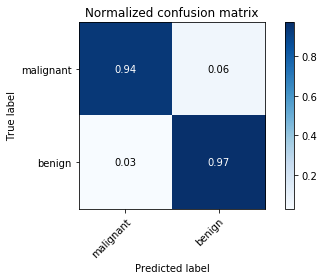

In [102]:
plot_confusion_matrix(y_test, y_pred, cname, normalize=True)
plt.show()